<a href="https://colab.research.google.com/github/Elkhattari-rabha/iccn-team/blob/master/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from scipy.io import loadmat
data_path1='/content/drive/My Drive/notre base de données/'
print("Loading data training set")        
dataset =loadmat('/content/drive/My Drive/notre base de données/' + 'trainingset.mat')
X = dataset['trainset']
y = dataset['traintarget']

Loading data training set


In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train1,X_test,y_train1,y_test=train_test_split(X,y,test_size=0.2)
X_train,X_val,y_train,y_val=train_test_split(X_train1,y_train1,test_size=0.1)

In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow import keras


In [0]:
from tensorflow.keras import layers
#notre model est vide mtn qu'on va le remplir
model = tf.keras.Sequential()
#input_dim nbr de variable en entré 
model.add(layers.Dense(128,activation="relu"))
#par default l'entré 
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(4,activation="relu"))

In [0]:
#accurancy=nbr correct  des predictions sur le nbr total

model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [9]:
#batc_size = le lot qui contient les element à traiter à la fois 
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=60,batch_size=100)
#_,acc=model.evaluate(X,y

Epoch 1/60
101/101 [==============================] - 3s 25ms/step - loss: 2.0164 - accuracy: 0.2485 - val_loss: 2.0668 - val_accuracy: 0.2843
Epoch 2/60
101/101 [==============================] - 3s 26ms/step - loss: 1.7973 - accuracy: 0.3112 - val_loss: 2.0310 - val_accuracy: 0.3605
Epoch 3/60
101/101 [==============================] - 2s 24ms/step - loss: 1.6015 - accuracy: 0.3652 - val_loss: 1.6606 - val_accuracy: 0.3919
Epoch 4/60
101/101 [==============================] - 2s 24ms/step - loss: 1.5860 - accuracy: 0.3672 - val_loss: 1.6663 - val_accuracy: 0.3892
Epoch 5/60
101/101 [==============================] - 2s 24ms/step - loss: 1.5911 - accuracy: 0.3673 - val_loss: 1.6615 - val_accuracy: 0.3919
Epoch 6/60
101/101 [==============================] - 2s 24ms/step - loss: 1.5746 - accuracy: 0.3672 - val_loss: 1.6718 - val_accuracy: 0.3910
Epoch 7/60
101/101 [==============================] - 2s 24ms/step - loss: 1.5788 - accuracy: 0.3468 - val_loss: 1.6890 - val_accuracy: 0.3309

In [15]:

# The returned "history" object holds a record of the loss values and metric values during training
print('\nhistory dict:', history.history)

# Evaluate the model on the test data using `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X_test, y_test, batch_size=128)
print('test loss, test acc:', results)
#prediction 
#model.predict(X_val)


history dict: {'loss': [2.016416311264038, 1.7972679138183594, 1.601460576057434, 1.5859613418579102, 1.5911365747451782, 1.5745689868927002, 1.5788174867630005, 1.5654758214950562, 1.5341628789901733, 1.551838994026184, 1.5958504676818848, 1.5837500095367432, 1.5895650386810303, 1.5770117044448853, 1.5722593069076538, 1.8111913204193115, 1.788516640663147, 1.7015362977981567, 1.6736558675765991, 1.621385931968689, 1.5848214626312256, 1.5783421993255615, 1.5757310390472412, 1.5785224437713623, 1.5658234357833862, 1.5651757717132568, 1.568750262260437, 1.5663069486618042, 1.5685962438583374, 1.5632426738739014, 1.5664035081863403, 1.574921727180481, 1.5784461498260498, 1.5793169736862183, 1.5632350444793701, 1.5932694673538208, 1.6164206266403198, 1.6069669723510742, 1.609131932258606, 1.6080615520477295, 1.6120350360870361, 1.6084333658218384, 1.6091012954711914, 1.597356915473938, 1.5868953466415405, 1.5796936750411987, 1.5656027793884277, 1.5542371273040771, 1.5571831464767456, 1.56

Text(0.5, 1.0, 'Loss Curves')

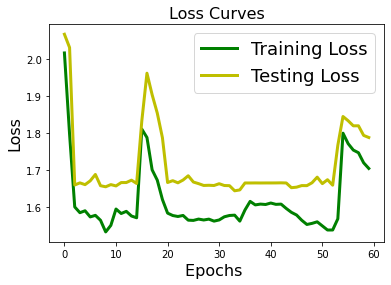

In [14]:
# #Tracer  la courbe   de la fonction de perte du model pour training et testing 
plt.plot(history.history['loss'], 'g', linewidth=3.0, label='Training Loss')
plt.plot(history.history['val_loss'], 'y', linewidth=3.0, label='Testing Loss')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss Curves', fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

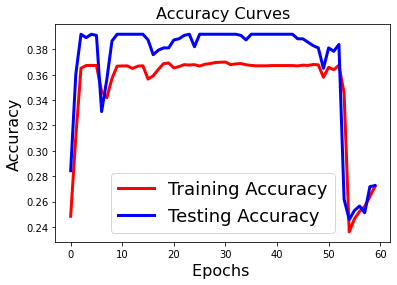

In [13]:
#Tracer  la courbe   Accuracy du model pour training et testing 
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r',linewidth=3.0, label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0, label='Testing Accuracy')
plt.legend(fontsize=18)
plt.xlabel('Epochs ', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.title('Accuracy Curves', fontsize=16)